In [1]:
%reload_ext autoreload
%autoreload 2

from grammar_models import GrammarModel
from plotting import plot_grammar_expanded


### Example: Pattern Discovery in Structured Sequences

This example demonstrates how the model identifies nested hierarchies. The input sequence `seq_input` is built from recurring motifs:

* **Primary Bigrams:** `(A, B)` and `(C, D)`.
* **Higher-Order 4-gram:** The sequence `(A, B, C, D)`, which is a composition of the two bigrams.
* **Trigram:** `(A, C, E)`, an independent recurring pattern.

**The Role of the Separator:** The symbol `|` acts as a hard boundary. The model is constrained to never create rules that span across this symbol, ensuring that patterns are only extracted from within individual "segments."

In [2]:
seq_input = ['A','B','C','D','|',
             'A','B','C','D','|', 
             'A','B','C','D','|',
             'A','B','C','D','|',
             'A','B','|',
             'A','B','|', 
             'A','B','|',
             'C','D','|',
             'C','D','|',
             'C','D','|',
             'A','C','E','|',
             'A','C','E','|',
             ]

The `GrammarModel` utilizes the **Minimum Description Length (MDL)** principle to balance compression and complexity. The induction process is governed by the following hyperparameters:

* **Rule Length Bounds (`rule_len_min`, `rule_len_max`):** Defines the range of n-gram sizes the model evaluates when proposing a new rule.
* **Model Cost Multiplier (`mdl_model_cost`):** Acts as a regularization weight. A higher value penalizes the creation of new rules (favoring a smaller grammar), while a lower value encourages deeper compression of the data (favoring a more complex grammar).

In [3]:
grammar_model = GrammarModel(seq_input, separator='|', mdl_model_cost=0.3, rule_len_min=2, rule_len_max=5)


We now execute the fitting process to induce the grammar. Note that the input sequence is provided during the model's initialization, so the `fit` method focuses on the iterative optimization of the MDL score.



By setting `verbose=True`, the model provides a step-by-step breakdown of:
* The **initial MDL score** (data cost vs. grammar cost).
* The **n-grams selected** for new rules based on frequency and length.
* Whether proposed rules were **accepted or rejected** based on the total description length.
* The **pruning steps** taken to keep the grammar lean.

In [4]:
grammar_model.fit(rule_label='rule', verbose=True)

  0%|          | 4/10000 [00:00<00:01, 5837.58it/s]

Starting MDL = 118.91 (data = 118.91, grammar = 0.00)
The sequence is of length 46, it contain 6 unique symbols.
The vocabulary is of size 6
Chosen the n-gram ('A', 'B'), with 7 occurrences in a sequence of length 46
The new MDL would be 112.01 (data = 109.49, grammar = 8.42)
Accepted the new rule ('rule_1', ('A', 'B')).
The new sequence is of length 39, it contain 6 unique symbols.
The new vocabulary is of size 7 and the total rules in the grammare are 1
--------------------------------------------------------------------------------
Chosen the n-gram ('C', 'D'), with 7 occurrences in a sequence of length 39
The new MDL would be 101.40 (data = 96.00, grammar = 18.00)
Accepted the new rule ('rule_2', ('C', 'D')).
The new sequence is of length 32, it contain 6 unique symbols.
The new vocabulary is of size 8 and the total rules in the grammare are 2
--------------------------------------------------------------------------------
Chosen the n-gram ('rule_1', 'rule_2'), with 4 occurrences 

Once the induction process is complete, the `summary` method provides a snapshot of the model's performance. This allows for a quick "before and after" comparison to evaluate the effectiveness of the compression.

The summary highlights:
* **Vocabulary Growth:** The expansion from original terminal symbols to the final set of rules.
* **Sequence Compression:** The reduction in total sequence length as repetitive motifs are replaced by rule identifiers.
* **Grammar Structure:** A detailed look at the induced rules and how many were pruned during the optimization process.

In [5]:
grammar_model.summary()

--------------------------------------------------------------------------------
                              VOCABULARY
--------------------------------------------------------------------------------
Started from a vocabulary of 6 symbols
Final vocabulary contains 10 symbols
--------------------------------------------------------------------------------
                              SEQUENCE
--------------------------------------------------------------------------------
Started from the sequence:
['A', 'B', 'C', 'D', '|', 'A', 'B', 'C', 'D', '|', 'A', 'B', 'C', 'D', '|', 'A', 'B', 'C', 'D', '|', 'A', 'B', '|', 'A', 'B', '|', 'A', 'B', '|', 'C', 'D', '|', 'C', 'D', '|', 'C', 'D', '|', 'A', 'C', 'E', '|', 'A', 'C', 'E', '|']
Of length 46 and containing 6 unique symbols
Ended with the sequence:
['rule_3', '|', 'rule_3', '|', 'rule_3', '|', 'rule_3', '|', 'rule_1', '|', 'rule_1', '|', 'rule_1', '|', 'rule_2', '|', 'rule_2', '|', 'rule_2', '|', 'rule_4', '|', 'rule_4', '|']
Of length 2

To better understand the hierarchical relationships discovered by the model, we can visualize the resulting grammar as a directed acyclic graph. This plot maps out how high-level rules are composed of simpler motifs and terminal symbols, using color-coding and spatial positioning to represent the depth and complexity of the induced structure.

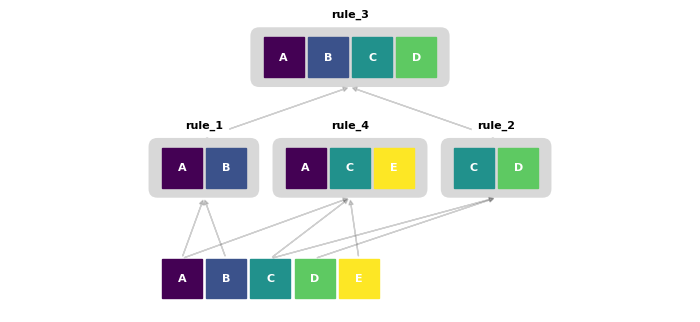

In [6]:
plot_grammar_expanded(grammar_model,  node_size=0.9, node_spacing=1,
                      vertical_spacing=2.5, label_color='w', cmap='viridis',
                      color_mode='symbol', colorbar_scale=0.7, fontsize=8)
